# Sales Analysis

This project involves analyzing sales data spanning 12 months to uncover selling pattern

In [1]:
import pandas as pd
import os

### Step 1: Merge data from each month into one CSV

In [8]:
os.listdir('Sales_Data')
files=[i for i in os.listdir('Sales_Data') if i.endswith('.csv')]
all_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('Sales_Data/'+file)
    all_data=pd.concat([df,all_data])
all_data.head()
all_data.shape

(186850, 6)

In [11]:
files = [file for file in os.listdir("Sales_Data") if file.endswith("csv")]

all_months_sales = pd.DataFrame()
for file in files:
    curr_data = pd.read_csv("Sales_Data/"+file)
    all_months_sales = pd.concat([all_months_sales, curr_data], ignore_index=True)
print(all_months_sales.shape)
all_months_sales.head()

(186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [12]:
all_months_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Step 2: Clean up the data!

Drop rows of NAN

In [13]:
num_rows = (all_months_sales.isnull().sum(axis=1)>0.5).sum() #num of rows with nan value
print(num_rows)
all_months_sales.dropna(axis=0, inplace=True)
all_months_sales.shape

545


(186305, 6)

Make columns correct type

pandas.to_numeric() is a function in the Pandas library used to convert the values of a pandas object (typically a Series or DataFrame column) to numeric data types. It is particularly useful when dealing with datasets where numerical data is stored as strings or other non-numeric types, and you need to convert them to numerical values for further analysis or computations.

It accepts several parameters, but the most important one is errors, which specifies how to handle errors during the conversion process. It can take three possible values:

- 'raise': This is the default behavior. It raises an error if it encounters any invalid parsing.
- 'coerce': It converts any invalid parsing to NaN (Not a Number).
- 'ignore': It ignores any invalid parsing and leaves the original values unchanged.


In [14]:
all_months_sales['Quantity Ordered'] = pd.to_numeric(all_months_sales['Quantity Ordered'],errors='coerce')
all_months_sales['Price Each'] = pd.to_numeric(all_months_sales['Price Each'],errors='coerce')
all_months_sales.dropna(axis=0, inplace=True)
all_months_sales.shape

(185950, 6)

Augment data with additional columns: add month & city columns

In [15]:
all_months_sales['month'] = all_months_sales['Order Date'].apply(lambda x: int(x[0:2]))
def get_city(x):
    return x.split(',')[1].strip(' ')
def get_state(x):
    return x.split(',')[2].split(' ')[1].strip(' ')
all_months_sales['city'] = all_months_sales['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_months_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


### Step 3: Data Exploration!

##### Question 1: What was the best month for sales? How much was earned that month?

In [16]:
all_months_sales['sales'] = all_months_sales['Price Each'] * all_months_sales['Quantity Ordered']
all_months_sales[['month','sales']].groupby('month').sum()

,sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


Text(0, 0.5, 'sales ($)')

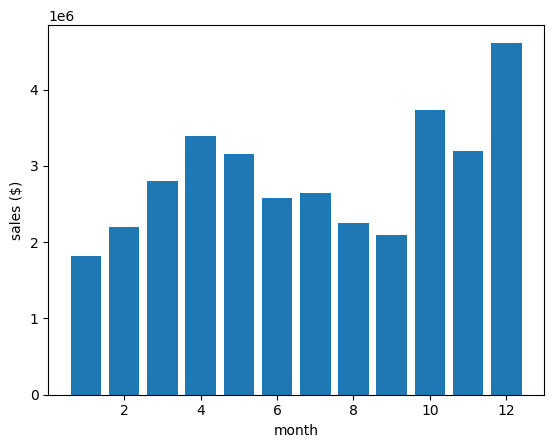

In [17]:
import matplotlib.pyplot as plt

plt.bar(range(1,13),all_months_sales[['month','sales']].groupby('month').sum()['sales'])
plt.xlabel('month')
plt.ylabel('sales ($)')

##### Question 2: What city sold the most product?

In [18]:
all_months_sales.groupby('city').sum()['sales']

city
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: sales, dtype: float64

In [19]:
all_months_sales['city'].unique()

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

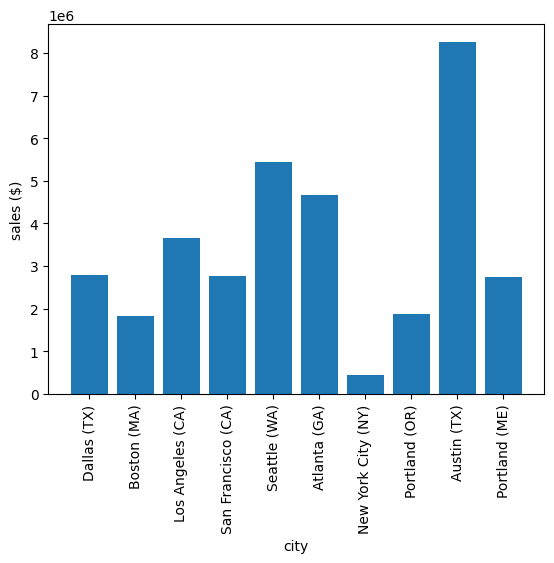

In [20]:
plt.bar(all_months_sales['city'].unique(), all_months_sales.groupby('city').sum()['sales'])
plt.xlabel('city')
plt.xticks(all_months_sales['city'].unique(), rotation = 'vertical')
plt.ylabel('sales ($)')
plt.show()

##### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [21]:
all_months_sales['hour'] = pd.to_datetime(all_months_sales['Order Date']).apply(lambda x: x.hour)
all_months_sales.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_13204\1503069332.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_months_sales['hour'] = pd.to_datetime(all_months_sales['Order Date']).apply(lambda x: x.hour)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales,hour
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9


In [22]:
hours = all_months_sales['hour'].unique()
all_months_sales.groupby(by='hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,city,sales
hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


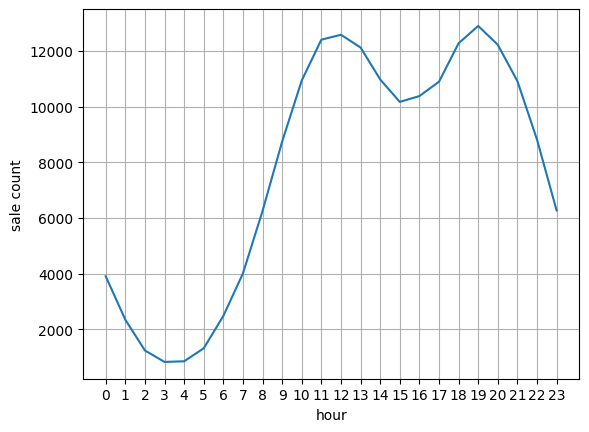

In [23]:
plt.plot(all_months_sales.groupby(by='hour').count()['Order ID'].index, all_months_sales.groupby(by='hour').count()['Order ID'].values )
plt.xlabel('hour')
plt.ylabel('sale count')
plt.xticks(hours)
plt.grid()

# slightly before 11am or 7pm

##### Question 4: What products are most often sold together?

In [47]:
df = all_months_sales[all_months_sales['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\Asus\AppData\Local\Temp\ipykernel_13204\3204453187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [54]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    count.update(Counter(combinations(row.split(','), 2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

##### Question 5: What product sold the most? Why do you think it sold the most?

In [25]:
df = all_months_sales.groupby('Product').sum()['Quantity Ordered']
df.head()

Product
20in Monitor               4129.0
27in 4K Gaming Monitor     6244.0
27in FHD Monitor           7550.0
34in Ultrawide Monitor     6199.0
AA Batteries (4-pack)     27635.0
Name: Quantity Ordered, dtype: float64

In [26]:
prices = all_months_sales[['Product','Price Each']].groupby('Product').mean()
prices.head()

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84


C:\Users\Asus\AppData\Local\Temp\ipykernel_13204\1194246200.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df.index, rotation= 'vertical')
C:\Users\Asus\AppData\Local\Temp\ipykernel_13204\1194246200.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


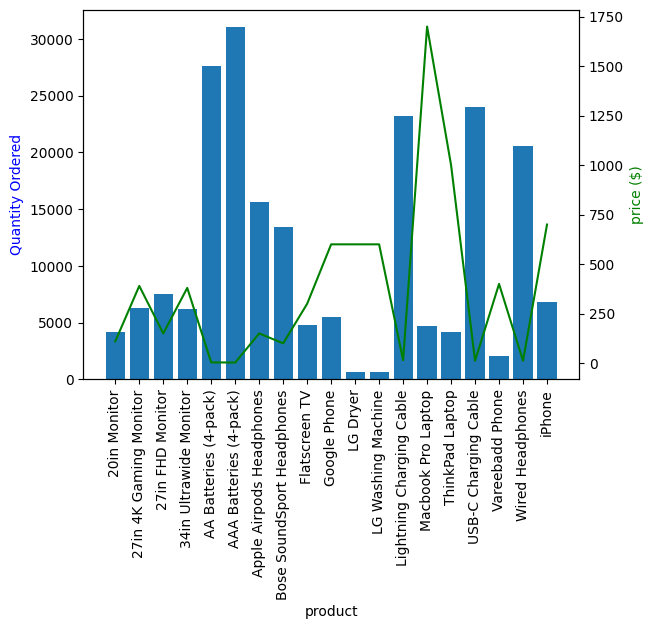

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(df.index, df.values)
ax2.plot(df.index,prices.values, 'g')

ax1.set_xlabel('product')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('price ($)',color='g')
ax1.set_xticklabels(df.index, rotation= 'vertical')
fig.show()

credit:

https://github.com/KeithGalli/Pandas-Data-Science-Tasks/blob/master/SalesAnalysis/SalesAnalysis.ipynb